In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/Zomato data .csv')

In [3]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [4]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [5]:
# convert the data type of rating column
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)
df['rate'] = df['rate'].apply(handleRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Type of Resturants

In [7]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Type of Resturants')

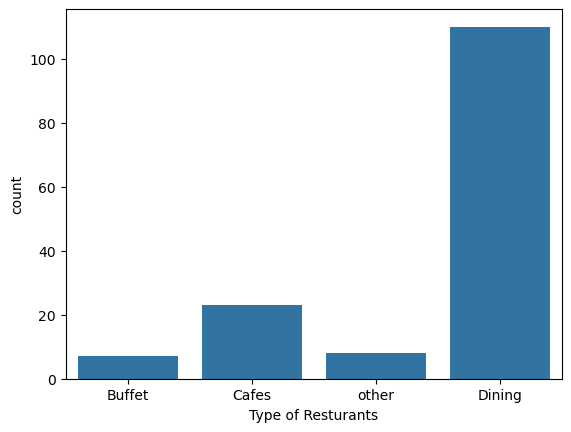

In [8]:
sns.countplot(x = df['listed_in(type)'])
plt.xlabel('Type of Resturants')              

# How many votes on each Resturant

In [9]:
group_data = df.groupby('listed_in(type)')['votes'].sum()
group_data

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

In [10]:
result = pd.DataFrame({'votes': group_data})
result

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


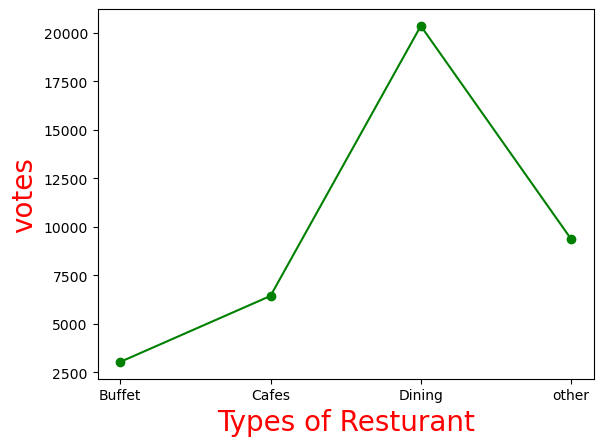

In [11]:
plt.plot(result, c = 'green', marker = 'o')
plt.xlabel('Types of Resturant', c = 'red', size = 20)
plt.ylabel('votes', c = 'red', size = 20)
plt.show()

# Ratings Distribution

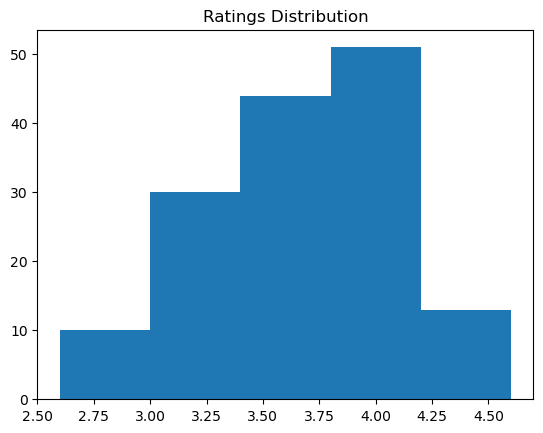

In [12]:
plt.hist(df['rate'], bins = 5,)
plt.title('Ratings Distribution')
plt.show()

# Average order spending by couples

In [13]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

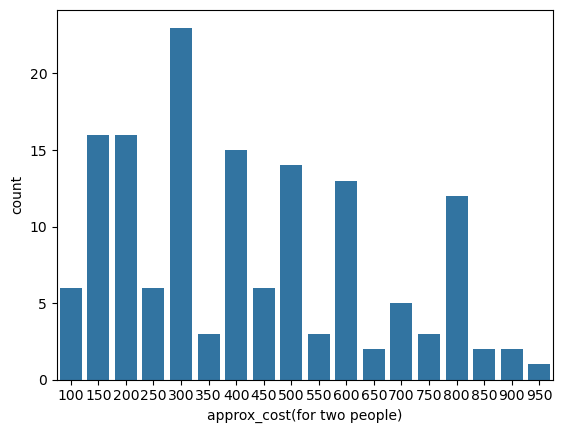

In [14]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x = couple_data)

# Which mode receive maximum rating (online\offline)

<Axes: xlabel='online_order', ylabel='rate'>

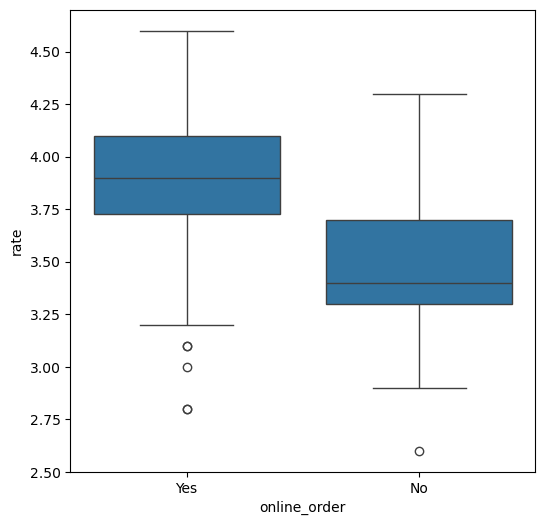

In [15]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order',y='rate',data = df)

In [16]:
pivot_table = df.pivot_table(index = 'listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
pivot_table

online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


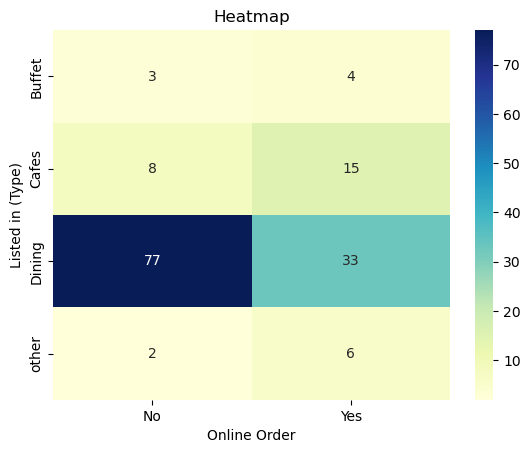

In [17]:
sns.heatmap(pivot_table, annot = True, cmap = 'YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed in (Type)')
plt.show()